In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [7]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
crime = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')

In [9]:
crime.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,11/21/2020,18:38:57,1A,700 LINNARD ST,HOMICIDE,Outside,FIREARM,815.0,SOUTHWEST,EDMONDSON VILLAGE,-76.676511,39.295361,NaN,STREET,NaN,1
1,11/21/2020,7:00:00,4E,1200 COMET MW,COMMON ASSAULT,I,NaN,211.0,SOUTHEAST,PLEASANT VIEW GARDENS,-76.601565,39.292938,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,11/21/2020,17:00:00,7A,1100 E BELVEDERE AVE,AUTO THEFT,O,NaN,522.0,NORTHERN,GLEN OAKS,-76.597329,39.359944,NaN,STREET,NaN,1
3,11/21/2020,4:30:00,3JF,1100 DUNDALK AVE,ROBBERY - RESIDENCE,I,FIREARM,234.0,SOUTHEAST,GRACELAND PARK,-76.534938,39.281161,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,11/21/2020,23:37:00,4C,1200 N LUZERNE AVE,AGG. ASSAULT,I,OTHER,332.0,EASTERN,BEREA,-76.581228,39.305433,NaN,ROW/TOWNHOUSE-OCC,Eastern 2,1


In [10]:
crime.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')

In [11]:
crime.describe()

,Post,Longitude,Latitude,Location 1,Total Incidents
count,320612.000000,321108.000000,321108.000000,0.0,321414.0
mean,505.371396,-76.579961,39.287419,NaN,1.0
std,261.117066,1.699689,0.872197,NaN,0.0
min,111.000000,-81.529189,0.000000,NaN,1.0
25%,234.000000,-76.649439,39.288157,NaN,1.0
50%,512.000000,-76.614154,39.302809,NaN,1.0
75%,724.000000,-76.587079,39.326892,NaN,1.0
max,943.000000,0.000000,39.661332,NaN,1.0


In [12]:
crime.drop(['Longitude','Latitude','Location 1'], axis=1, inplace=True)

In [13]:
crime.head(10)
crime.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Premise', 'vri_name1', 'Total Incidents'],
      dtype='object')

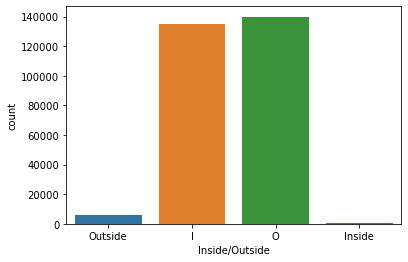

In [14]:
sns.countplot(x='Inside/Outside',data=crime)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

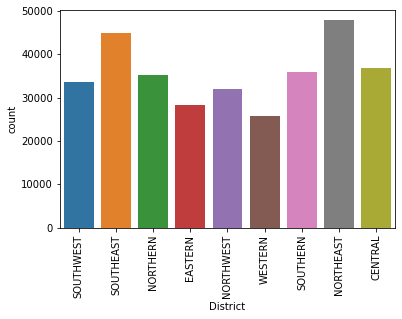

In [15]:
sns.countplot(x='District',data=crime)
plt.xticks(rotation=90)

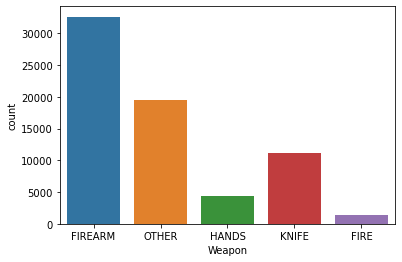

In [16]:
sns.countplot(x='Weapon',data=crime)

In [17]:
def crime_details(crimeDetails):
    return crime[crime['District']==crimeDetails][[ 'Weapon','Post','Premise','Total Incidents','vri_name1','Description','Inside/Outside','CrimeCode']]

In [18]:
nw = crime_details('NORTHWEST')

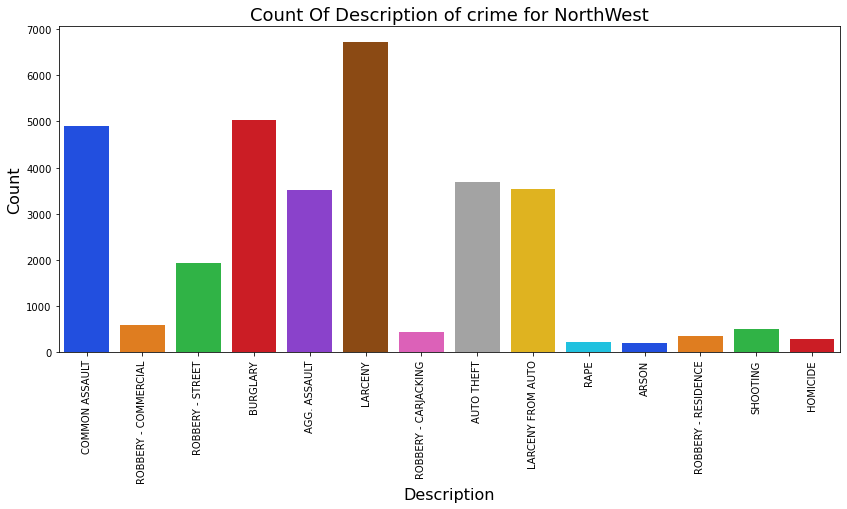

In [19]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Description', data=nw, palette='bright')
ax.set_title(label='Count Of Description of crime for NorthWest', fontsize=18)

ax.set_xlabel(xlabel='Description', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90)

plt.show()

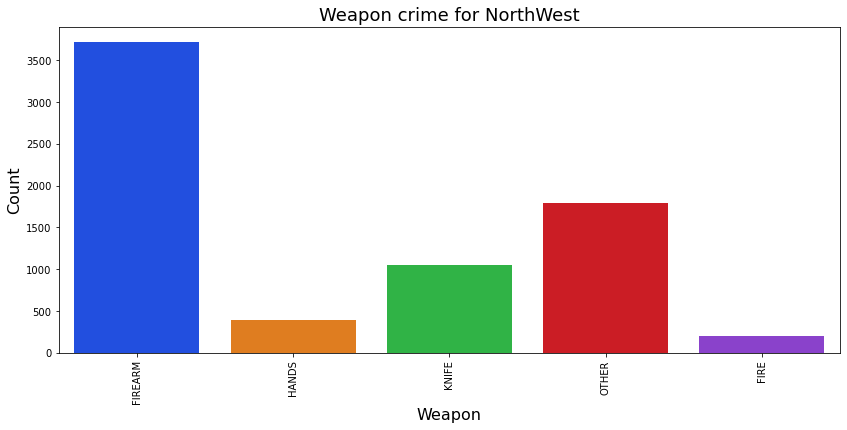

In [20]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Weapon', data=nw, palette='bright')
ax.set_title(label='Weapon crime for NorthWest', fontsize=18)

ax.set_xlabel(xlabel='Weapon', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90)

plt.show()

In [21]:
se = crime_details('SOUTHEAST')

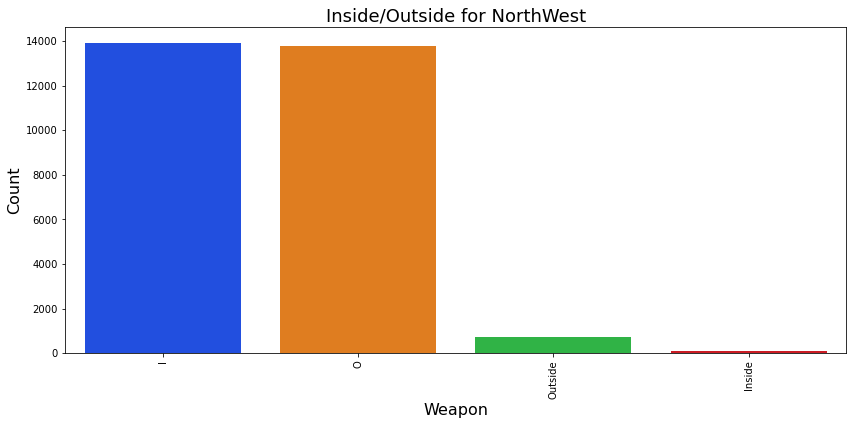

In [22]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Inside/Outside', data=nw, palette='bright')
ax.set_title(label='Inside/Outside for NorthWest', fontsize=18)

ax.set_xlabel(xlabel='Weapon', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90)

plt.show()

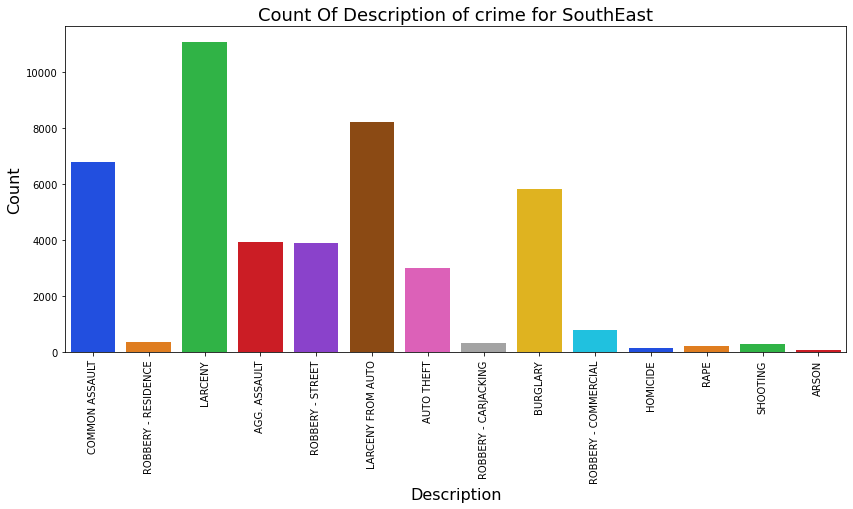

In [23]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Description', data=se, palette='bright')
ax.set_title(label='Count Of Description of crime for SouthEast', fontsize=18)

ax.set_xlabel(xlabel='Description', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90)

plt.show()

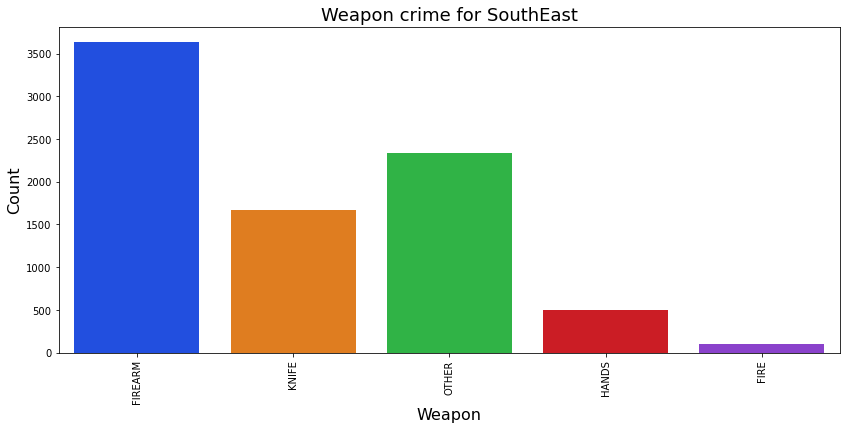

In [24]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Weapon', data=se, palette='bright')
ax.set_title(label='Weapon crime for SouthEast', fontsize=18)

ax.set_xlabel(xlabel='Weapon', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90)

plt.show()

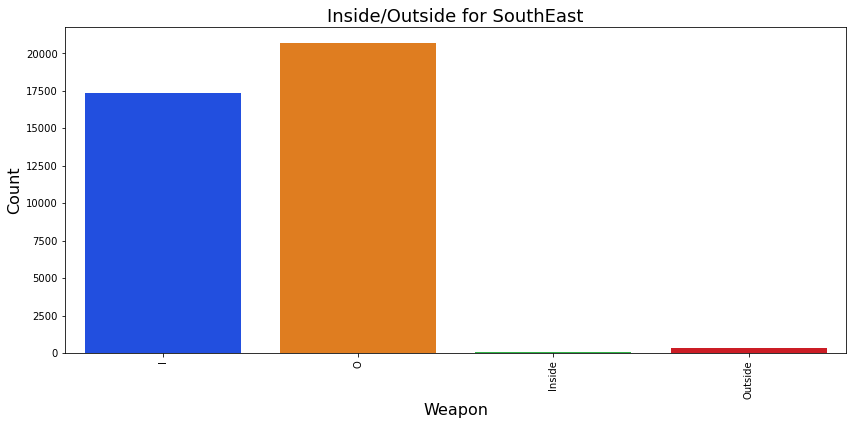

In [25]:
plt.figure(figsize=(14,6))

ax = sns.countplot(x='Inside/Outside', data=se, palette='bright')
ax.set_title(label='Inside/Outside for SouthEast', fontsize=18)

ax.set_xlabel(xlabel='Weapon', fontsize=16)
ax.set_ylabel(ylabel='Count', fontsize=16)
plt.xticks(rotation=90)

plt.show()

In [26]:
crimeYear = crime["CrimeDate"].apply(lambda x:x.split("/")).str[2].astype(str)
print('CrimeDate',crimeYear)
crime['crimeYear'] = crimeYear.astype('int')

CrimeDate 0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
321409    1977
321410    1975
321411    1973
321412    1969
321413    1963
Name: CrimeDate, Length: 321414, dtype: object


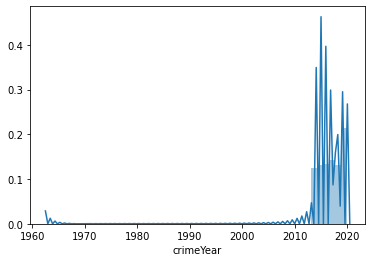

In [27]:
sns.distplot(crime['crimeYear'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text major ticklabel objects>)

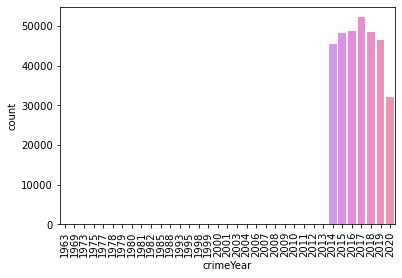

In [28]:
sns.countplot(x='crimeYear',data=crime)
plt.xticks(rotation=90)

In [29]:
crimeMonth = crime["CrimeDate"].apply(lambda x:x.split("/")).str[0].astype(str)
print('CrimeDate',crimeMonth)
crime['crimeMonth'] = crimeMonth.astype('int')

CrimeDate 0         11
1         11
2         11
3         11
4         11
          ..
321409    05
321410    06
321411    07
321412    07
321413    10
Name: CrimeDate, Length: 321414, dtype: object


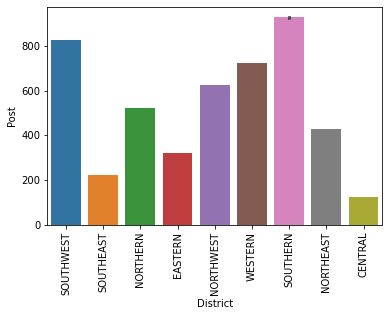

In [30]:
sns.barplot(x='District',y='Post',data=crime)
plt.xticks(rotation=90)
plt.show()

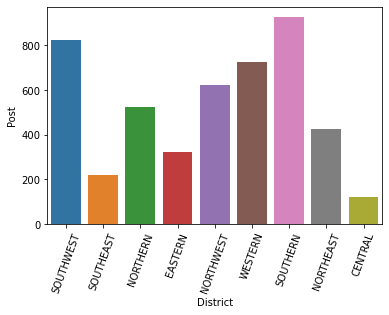

In [31]:
sns.barplot(x='District',y='Post',data=crime)
plt.xticks(rotation = 70)
plt.show()

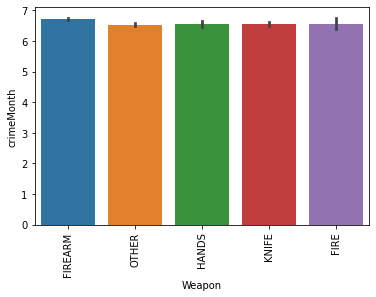

In [32]:
sns.barplot(x='Weapon',y='crimeMonth',data=crime)
plt.xticks(rotation = 90)
plt.show()

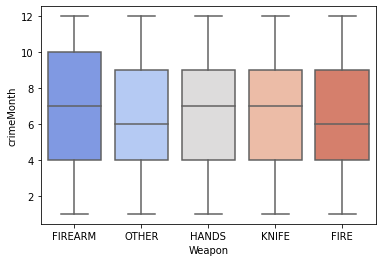

In [33]:
sns.boxplot(x="Weapon", y="crimeMonth",data=crime, palette="coolwarm")

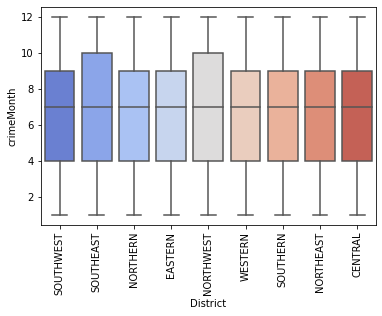

In [34]:
sns.boxplot(x="District", y="crimeMonth",data=crime, palette="coolwarm")
plt.xticks(rotation = 90)
plt.show()

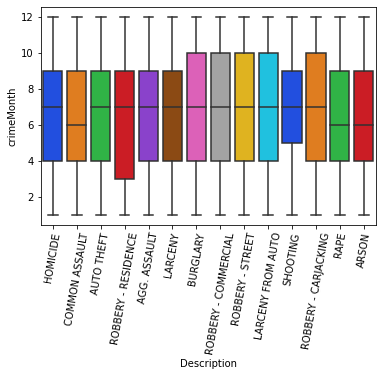

In [35]:
sns.boxplot(x="Description", y="crimeMonth",data=crime, palette="bright")
plt.xticks(rotation = 80)
plt.show()

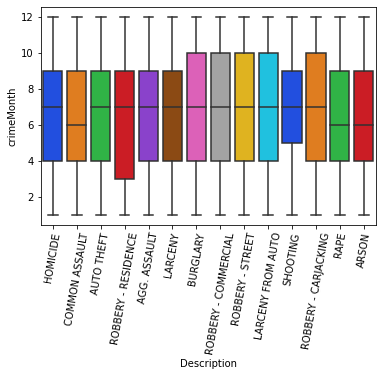

In [36]:
sns.boxplot(x="Description", y="crimeMonth",data=crime, palette="bright")
plt.xticks(rotation = 80)
plt.show()

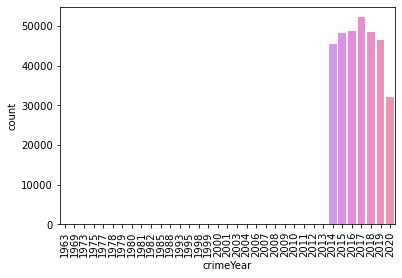

In [37]:
sns.countplot(x='crimeYear', data=crime)
plt.xticks(rotation = 90)
plt.show()

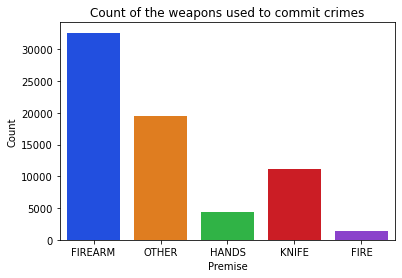

In [38]:
pp = sns.countplot(x=crime['Weapon'], data=crime, palette='bright')
pp.set_title(label='Count of the weapons used to commit crimes')

pp.set_xlabel(xlabel = 'Premise')
pp.set_ylabel(ylabel = 'Count')

plt.show()

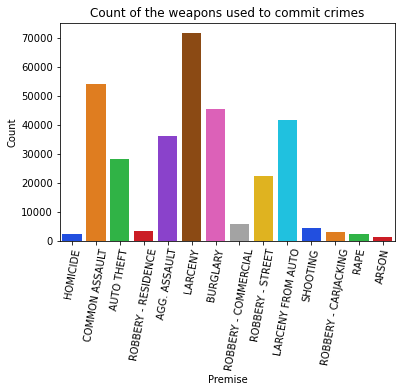

In [39]:
pp = sns.countplot(x=crime['Description'], data=crime, palette='bright')
pp.set_title(label='Count of the weapons used to commit crimes')

pp.set_xlabel(xlabel = 'Premise')
pp.set_ylabel(ylabel = 'Count')
plt.xticks(rotation = 80)

plt.show()

In [40]:
before12 = crime[crime['CrimeTime'].lt('12')]['District'].value_counts()
print("Crimes before 12: \n", before12.astype(int))

Crimes before 12: 
 NORTHEAST    6455
SOUTHEAST    5637
CENTRAL      4856
SOUTHERN     4538
SOUTHWEST    4502
NORTHERN     4497
NORTHWEST    3999
EASTERN      3887
WESTERN      3456
Name: District, dtype: int32


In [41]:
after12 = crime[crime['CrimeTime'].gt('12')]['District'].value_counts()
print("Crimes after 12: \n", after12.astype(int))

Crimes after 12: 
 NORTHEAST    41394
SOUTHEAST    39386
CENTRAL      32098
SOUTHERN     31361
NORTHERN     30849
SOUTHWEST    29033
NORTHWEST    27915
EASTERN      24341
WESTERN      22381
Name: District, dtype: int32


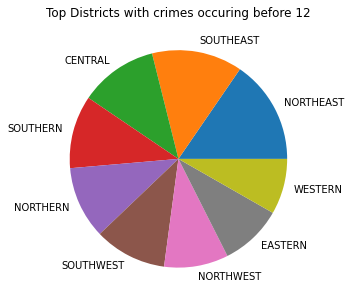

In [42]:
values = before12
#label = before12.name
label = ['NORTHEAST','SOUTHEAST','CENTRAL','SOUTHERN','NORTHERN','SOUTHWEST','NORTHWEST','EASTERN','WESTERN' ]

plt.figure(figsize = (5, 5))
plt.pie(values, labels=label)
plt.title('Top Districts with crimes occuring before 12')
plt.show()

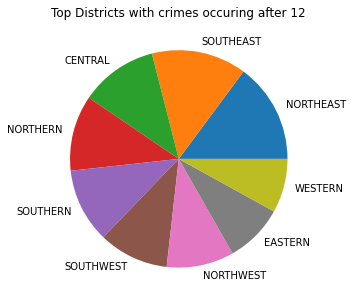

In [43]:
values = after12
#label = after12.name
label = ['NORTHEAST','SOUTHEAST','CENTRAL','NORTHERN','SOUTHERN','SOUTHWEST','NORTHWEST','EASTERN','WESTERN' ]

plt.figure(figsize = (5, 5))
plt.pie(values, labels=label)
plt.title('Top Districts with crimes occuring after 12')
plt.show()